In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


In [2]:
crypto_df = pd.read_csv(Path('crypto_data.csv'))
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
# Keep only cryptocurrencies that are trading
crypto_df = crypto_df.loc[crypto_df['IsTrading'] == True]
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
# Remove the 'IsTrading' column
crypto_df = crypto_df.drop(columns = 'IsTrading')
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
# Remove rows with at least 1 null value
crypto_df.isnull().sum()

Unnamed: 0           0
CoinName             0
Algorithm            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [6]:
crypto_df = crypto_df.dropna()
crypto_df.isnull().sum()

Unnamed: 0         0
CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [7]:
crypto_df.shape

(685, 6)

In [8]:
# Create a new DataFrame that holds only the cryptocurrencies names.
coinname_df = pd.DataFrame(crypto_df, columns = ['CoinName'])

In [9]:
# Remove rows with cryptocurrencies having no coins mined
crypto_df=(crypto_df.loc[crypto_df['TotalCoinsMined'] > 0])

In [10]:
# Drop rows where there are 'N/A' text values
crypto_df = crypto_df.dropna(axis=0)

In [11]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
crypto_df = crypto_df.drop(['CoinName','Unnamed: 0'], axis=1)

In [12]:
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [13]:
# Create dummy variables for text features
X= pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Standardize data
crypto_scaled = StandardScaler().fit_transform(X)
print(crypto_scaled)

[[-0.11710817 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.145009   -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561  4.48942416 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 ...
 [-0.09561336 -0.13217937 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11694817 -0.15255998 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11710536 -0.15285552 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


In [15]:
# Use PCA to reduce dimensions to 3 principal components
pca = PCA(n_components=0.9)

crypto_pca = pca.fit_transform(crypto_scaled)


In [16]:
# Create a DataFrame with the principal components data
pca_df = pd.DataFrame(crypto_pca,index=X.index)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.540297e-14,-1.165476e-11,1.934877e-14,-0.007129,-1.319756,-0.051813,...,6.791870e-16,3.244575e-16,-1.011010e-15,-2.982695e-15,-1.731974e-15,5.284002e-15,-1.924284e-15,3.781938e-15,-4.015154e-16,2.426681e-16
2,-0.318434,1.032331,-0.591126,0.001386,-1.523083e-14,-1.155975e-11,1.954039e-14,-0.007739,-1.322514,-0.056674,...,-4.586593e-16,9.072591e-16,-2.269850e-15,-2.263852e-15,-2.660612e-15,7.651009e-15,-1.525656e-15,3.355866e-15,-5.762231e-16,5.071767e-18
5,2.305468,1.656383,-0.683617,0.004731,-1.497294e-14,-3.949449e-11,3.772165e-14,-0.054781,-1.542879,-0.943951,...,1.780031e-14,-4.989842e-14,4.825798e-14,3.187038e-14,3.098898e-14,-9.932864e-14,-3.553773e-14,-7.367435e-14,3.182511e-14,-1.967865e-14
7,-0.145184,-1.320593,0.192813,-0.001229,3.693199e-15,1.025361e-11,-8.871203e-15,-0.002071,0.281463,0.251862,...,1.280944e-15,-1.279970e-15,8.288230e-15,2.691578e-15,-4.122980e-15,-1.425553e-14,-3.198069e-15,-1.367220e-14,6.083623e-15,-1.688258e-14
8,-0.151768,-2.036192,0.396182,-0.001705,1.570991e-14,1.423168e-11,-1.220895e-14,0.027735,0.519099,0.188820,...,-6.092554e-16,1.358936e-14,7.275832e-14,-8.776375e-14,-7.938475e-14,-6.460819e-14,3.930429e-14,-7.474587e-14,1.316774e-13,-2.987009e-13


In [17]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=250)

In [18]:
# Reduce dimensions
tsne_features = tsne.fit_transform(pca_df)

In [19]:
# The dataset has 2 columns
tsne_features.shape

(532, 2)

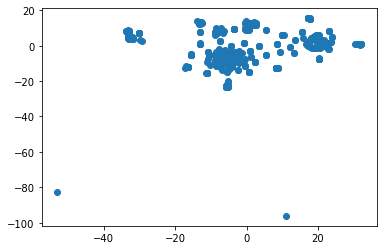

In [20]:
# Plot Results 
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [21]:
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,46979.075160
1,2,45721.623608
2,3,44654.846002
3,4,43684.795459
4,5,43050.187963


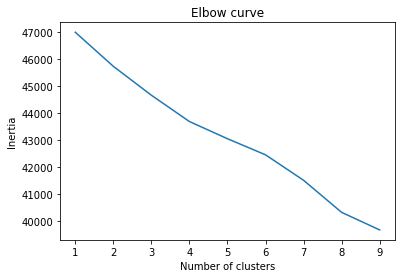

In [22]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,10))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()

In [23]:
# Initialize the K-Means model
model = KMeans(n_clusters=5, random_state=0)
# Fit the model
model.fit(pca_df)
# Predict clusters
predictions = model.predict(pca_df)


In [24]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features
clustered_df = crypto_df.join(pca_df)
clustered_df['CoinName'] = coinname_df['CoinName']
clustered_df['Class'] = predictions
clustered_df.head(50)

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,0,1,2,3,4,5,...,66,67,68,69,70,71,72,73,CoinName,Class
0,Scrypt,PoW/PoS,4.199995e+01,42,-0.335099,1.032189,-0.590713,0.001397,-1.540297e-14,-1.165476e-11,...,-1.011010e-15,-2.982695e-15,-1.731974e-15,5.284002e-15,-1.924284e-15,3.781938e-15,-4.015154e-16,2.426681e-16,42 Coin,0
2,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.318434,1.032331,-0.591126,0.001386,-1.523083e-14,-1.155975e-11,...,-2.269850e-15,-2.263852e-15,-2.660612e-15,7.651009e-15,-1.525656e-15,3.355866e-15,-5.762231e-16,5.071767e-18,404Coin,0
5,X13,PoW/PoS,2.927942e+10,314159265359,2.305468,1.656383,-0.683617,0.004731,-1.497294e-14,-3.949449e-11,...,4.825798e-14,3.187038e-14,3.098898e-14,-9.932864e-14,-3.553773e-14,-7.367435e-14,3.182511e-14,-1.967865e-14,EliteCoin,0
7,SHA-256,PoW,1.792718e+07,21000000,-0.145184,-1.320593,0.192813,-0.001229,3.693199e-15,1.025361e-11,...,8.288230e-15,2.691578e-15,-4.122980e-15,-1.425553e-14,-3.198069e-15,-1.367220e-14,6.083623e-15,-1.688258e-14,Bitcoin,0
8,Ethash,PoW,1.076842e+08,0,-0.151768,-2.036192,0.396182,-0.001705,1.570991e-14,1.423168e-11,...,7.275832e-14,-8.776375e-14,-7.938475e-14,-6.460819e-14,3.930429e-14,-7.474587e-14,1.316774e-13,-2.987009e-13,Ethereum,0
9,Scrypt,PoW,6.303924e+07,84000000,-0.165743,-1.125922,-0.012370,-0.000602,-1.879359e-15,5.024703e-12,...,-1.486600e-15,-6.085348e-16,-1.052670e-15,3.533702e-15,-2.396458e-15,2.362477e-15,-1.941287e-15,3.045503e-15,Litecoin,0
10,X11,PoW/PoS,9.031294e+06,22000000,-0.395438,1.237148,-0.517551,0.001434,-1.270036e-14,-1.196514e-11,...,-2.647790e-15,-2.530727e-15,5.027245e-16,7.143556e-16,-3.408562e-16,4.900525e-16,2.680468e-15,-2.289556e-15,Dash,0
11,CryptoNight-V7,PoW,1.720114e+07,0,-0.149606,-2.223198,0.423077,-0.001835,2.233330e-15,1.531913e-11,...,1.790018e-13,6.848518e-14,-3.591194e-14,4.923299e-14,3.221107e-13,-1.391910e-13,4.348524e-13,-2.656721e-13,Monero,0
12,Ethash,PoW,1.133597e+08,210000000,-0.150210,-2.036294,0.396162,-0.001703,1.575522e-14,1.421459e-11,...,7.306008e-14,-8.821911e-14,-7.791146e-14,-6.629268e-14,3.878960e-14,-7.427599e-14,1.313172e-13,-2.982473e-13,Ethereum Classic,0
13,Equihash,PoW,7.383056e+06,21000000,-0.149363,-2.049335,0.412968,-0.001745,8.420965e-15,1.455608e-11,...,-2.977079e-15,-1.066071e-15,3.700964e-16,7.297066e-16,-2.055214e-15,1.067537e-15,2.188394e-15,-5.945674e-16,ZCash,0


In [25]:
np.sort(clustered_df['Class'].unique())

array([0, 1, 2, 3, 4])

#### Based on the model the cryptocurrencies can be grouped into 5 classes which can be further analysed to with respect to its investment gains and performance